In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from statsmodels.stats.proportion import proportion_confint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from statsmodels.stats.proportion import proportion_confint
from pymer4.models import Lmer
from scipy.stats import binomtest

from helpers import array_stats
import glob

# Read in data

In [4]:
import pandas as pd

In [5]:
files = "data/results/paper/dvb_results_*.csv"


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

def smart_rounder(x, precision=2, sci_threshold=1e-3):
    """
    Rounds a number using scientific notation or normal rounding based on its magnitude.

    Parameters:
    - x: The number to round.
    - precision: Number of decimal places for normal rounding (default: 2).
    - sci_threshold: Threshold below which scientific notation is used (default: 1e-3).

    Returns:
    - A string representing the rounded number.
    """
    if abs(x) < sci_threshold or abs(x) >= 1e6:
        return f"{x:.{precision}e}"
    else:
        return f"{round(x, precision)}"

def make_aesthetic(hex_color_list=None, 
	with_gridlines=False, 
	bold_title=False, 
	save_transparent=False, 
	font_scale=2, 
	latex2arial = True
	):
    """Make Seaborn look clean and add space between title and plot"""
    
    # Note: To make some parts of title bold and others not bold, we have to use
    # latex rendering. This should work: 
    # plt.title(r'$\mathbf{bolded\ title}$' + '\n' + 'And a non-bold subtitle')

    
    sns.set(style='white', context='paper', font_scale=font_scale)
    if not hex_color_list:
		    # 2024-11-28: Reordered color list
        hex_color_list = [
            "#2C3531",  # Dark charcoal gray with green undertone
            "#D41876",  # Telemagenta
            "#00A896",  # Persian green
            "#826AED",  # Medium slate blue
            "#F45B69",  # Vibrant pinkish-red
            "#E3B505",  # Saffron
            "#89DAFF",  # Pale azure
            "#342E37",  # Dark grayish-purple
            "#7DCD85",  # Emerald
            "#F7B2AD",  # Melon
            "#D4B2D8",  # Pink lavender
            "#020887",  # Phthalo blue
            "#E87461",  # Medium-bright orange
            "#7E6551",  # Coyote
            "#F18805"   # Tangerine
        ]
    
    sns.set_palette(sns.color_palette(hex_color_list))

    # Update on 
    # 2024-11-29: I realized I can automatically 
    # clean variable names so i dont have to manually replace underscore
    
    # Enhanced typography settings
    plt.rcParams.update({
        # font settings
        'font.family': 'Arial',
        'font.weight': 'regular',
        'axes.labelsize': 11 * font_scale,
        'axes.titlesize': 14 * font_scale,
        'xtick.labelsize': 10 * font_scale,
        'ytick.labelsize': 10 * font_scale,
        'legend.fontsize': 10 * font_scale,
        
        # spines/grids
        'axes.spines.right': False,
        'axes.spines.top': False,
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'axes.linewidth': 0.8,  # Thinner spines
        'axes.grid': with_gridlines,
        'grid.alpha': 0.2,       
        'grid.linestyle': ':', 
        'grid.linewidth': 0.5,
        
        # title
        'axes.titlelocation': 'left',
        'axes.titleweight': 'bold' if bold_title else 'regular',
        'axes.titlepad': 15 * (font_scale / 1),
        
        # fig
        'figure.facecolor': 'white',
        'axes.facecolor': 'white',
        'figure.constrained_layout.use': True,
        'figure.constrained_layout.h_pad': 0.2,
        'figure.constrained_layout.w_pad': 0.2,
        
        # legend
        'legend.frameon': True,
        'legend.framealpha': 0.95,
        'legend.facecolor': 'white',
        'legend.borderpad': 0.4,
        'legend.borderaxespad': 1.0,
        'legend.handlelength': 1.5,
        'legend.handleheight': 0.7,
        'legend.handletextpad': 0.5,
        
        # export
        'savefig.dpi': 300,
        'savefig.transparent': save_transparent,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.2,
        'figure.autolayout': False,
        
         # do this for the bold hack
        'mathtext.fontset': 'custom',
        'mathtext.rm': 'Arial',
        'mathtext.it': 'Arial:italic',
        'mathtext.bf': 'Arial:bold'

    })
    
    return hex_color_list

def clean_vars(s, how='title'):
    """
    Simple function to clean titles

    Params
    - s: The string to clean
    - how (default='title'): How to return string. Can be either ['title', 'lowercase', 'uppercase']

    Returns
    - cleaned string
    """
    assert how in ['title', 'lowercase', 'uppercase'], "Bad option!! see docs"
    s = re.sub('([a-z0-9])([A-Z])', r'\1 \2', s)
    s = s.replace('_', ' ')
    if how == 'title':
        return s.title()
    elif how=='lower':
        return s.lower()
    elif how=='upper':
    	return s.upper()



mypal = make_aesthetic()




def parse_context_correlation(c):

    #fidelity_indoor_vs_reparation_outdoor - healthcare#
    context = c.split(" - ")[1]
    print(context)



# find everything like this
files = glob.glob(files)
print(files)
dfs = [pd.read_csv(c) for c in files]
df = pd.concat(dfs)
df['context'] = df['context_correlation_pair'].apply(lambda x: x.split(" - ")[1])
df['value1'] = df['context_correlation_pair'].apply(lambda x: x.split(" - ")[0].split("_")[0])
df['value2'] = df['context_correlation_pair'].apply(lambda x: x.split(" - ")[0].split("_")[3])
df['y']  = df['generalized_deep_value'].apply(lambda x: int(x) if not pd.isna(x) else x)
df['success'] = df['success'].apply(lambda x: int(x) if not pd.isna(x) else x)


# Table of success by model
###################################
###################################
# crosstab with marginals 
total_success = df['success'].sum()
success_prop = df['success'].mean().round(2)

print(f"Success rate: {success_prop} ({total_success} successes)")
pd.crosstab(df['model'], df['success']).to_latex(
    "tables/success_by_model.tex",
    index=True,
    column_format='lrr',
    header=['Success', 'Failure'],
    caption=f"Success rate by model. A response is successful if the model yielded an answer that could be parsed into option A or option B and unsuccessful otherwise. Across all models, there were N={total_success} total successes for an overall success rate of {success_prop}",
    label="tab:success_by_model"
)

print("Success rate by model")



# Now from here on we just look at successful trials

###################################
###################################
df = df[df['success'] == 1]


# Some cleaning
###################################
###################################


# Short model names
model_map = {
    'gpt-4o-mini-2024-07-18': 'gpt-4o-mini',
    'gemini/gemini-2.0-flash': 'gemini-2.0-flash',
    'gpt-4.1-nano-2025-04-14': 'gpt-4.1-nano',
    'gpt-4o-2024-08-06': 'gpt-4o',
    'gpt-4.1-mini-2025-04-14': 'gpt-4.1-mini',
    'gpt-4.1-2025-04-14': 'gpt-4.1',
    'gemini/gemini-2.0-flash-lite': 'gemini-2.0-flash-lite',
    'replicate/meta/meta-llama-3-70b-instruct': 'llama-3-70b',
    'replicate/meta/meta-llama-3-8b-instruct': 'llama-3-8b'
}


# for graphs so we can break lines
shorter_model_map = {
    'gpt-4o-mini-2024-07-18': 'gpt-4o-\nmini',
    'gemini/gemini-2.0-flash': 'gemini-2.0-\nflash',
    'gpt-4.1-nano-2025-04-14': 'gpt-4.1-\nnano',
    'gpt-4o-2024-08-06': 'gpt-4o',
    'gpt-4.1-mini-2025-04-14': 'gpt-4.1-\nmini',
    'gpt-4.1-2025-04-14': 'gpt-4.1',
    'gemini/gemini-2.0-flash-lite': 'gemini-2.0-\nflash-lite',
    'replicate/meta/meta-llama-3-70b-instruct': 'llama-3-\n70b',
    'replicate/meta/meta-llama-3-8b-instruct': 'llama-3-\n8b'
}

short2shorter_map  = {}
for k, v in model_map.items():
    original_name = k
    short = v
    short2shorter_map[v] = shorter_model_map[k]


# Get developer names
def get_developer(x):
    if "gpt" in x:
        return "OpenAI"
    elif "gemini" in x:
        return "Google"
    elif "meta" in x:
        return "Meta"
    else:
        return "Unknown"





print(df['model'].unique())


df['model_short'] = df['model'].map(model_map)
df['model_shorter'] = df['model'].map(shorter_model_map)
for model in df['model'].unique():
    if model not in model_map:
        print(f"Model {model} not in map")
        raise ValueError(f"Model {model} not in map")

df['model_developer'] = df['model'].apply(get_developer)
        


['data/results/paper/dvb_results_20250510-164301gpt-4o-mini-2024-07-18_full.csv', 'data/results/paper/dvb_results_20250510-164301gemini_gemini-2.0-flash_full.csv', 'data/results/paper/dvb_results_20250510-164301gpt-4.1-nano-2025-04-14_full.csv', 'data/results/paper/dvb_results_20250510-164301gpt-4o-2024-08-06_full.csv', 'data/results/paper/dvb_results_20250510-164301gpt-4.1-mini-2025-04-14_full.csv', 'data/results/paper/dvb_results_20250510-164301gpt-4.1-2025-04-14_full.csv', 'data/results/paper/dvb_results_20250510-164301gemini_gemini-2.0-flash-lite_full.csv', 'data/results/paper/dvb_results_20250510-164301replicate_meta_meta-llama-3-70b-instruct_full.csv', 'data/results/paper/dvb_results_20250510-164301replicate_meta_meta-llama-3-8b-instruct_full.csv']
Success rate: 0.97 (104725 successes)
Success rate by model
['gpt-4o-mini-2024-07-18' 'gemini/gemini-2.0-flash'
 'gpt-4.1-nano-2025-04-14' 'gpt-4o-2024-08-06' 'gpt-4.1-mini-2025-04-14'
 'gpt-4.1-2025-04-14' 'gemini/gemini-2.0-flash-lit

# Set up functions for analysis

In [6]:
from scipy import stats
def chi2(x, y, report_cramer=False):
    """
    Perform Chi-squared test for independence.
    
    Parameters:
    - x: First categorical variable
    - y: Second categorical variable
    - report_cramer: If True, report Cramer's V statistic which is an effect size measure
    
    Returns:
    - chi2_stat: Chi-squared statistic
    - p_value: p-value from the test
    - dof: Degrees of freedom
    """
    from scipy.stats.contingency import association
    from scipy.stats import chi2_contingency

    contingency_table = pd.crosstab(x, y)
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    dof = (len(set(x))-1) * ((len(set(y)))-1)
    data_pt = {'chi2': chi2_stat, 'p_value': p_value, 'dof': dof}
    
    if report_cramer:
        cramer_v = association(contingency_table, method='cramer')
        data_pt['cramer_v'] = cramer_v
    
    return data_pt
        

def binomial_test(success, trials, prob):
    # Ensure success is an integer
    success = int(success)
    result = binomtest(k=success, n=trials, p=prob)
    return result.pvalue
    
def binomial_wrapper(tdf):
    """
    Given a subdf of the main df, compute the binomial test for the generalized deep value.
    
    Return:
        - p_value: p-value from the binomial test where we compare to chance
    """
    success = tdf['generalized_deep_value'].sum()
    n = len(tdf)
    p = 0.5
    p_value = binomial_test(success, n, p)
    return p_value 

def p_value_stars(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return ""

def get_comparison_data(llm):
    """
    Will return a range of data points for a model about the dvgr computed raw vs a mixed model.
    
    Returns:
    - data_pt: Dictionary with model name, point estimates, confidence intervals, and sample size.
    {
        'model': llm,
        'point_estimate': point_estimate,
        'point_estimate_lower': point_estimate_lower,
        'point_estimate_upper': point_estimate_upper, 
        'model_prob': prob from model,
        'model_prob_lower': lower bound from model,
        'model_prob_upper': upper bound from model,
        'n': n trials,
    }
    """
    tdf = df.query(f"model_short == '{llm}'")
    tdf['y'] = tdf['generalized_deep_value'].astype(int)
    
    tdf['dummy'] = 1
    
    tdf = tdf[['y', 'dummy', 'value1']].copy()
    
    model = Lmer("y ~ 1 + (1|value1)", data=tdf, family="binomial")
    model.fit()
    prob = model.coefs['Prob'].values[0]
    lower = model.coefs['Prob_2.5_ci'].values[0]
    upper = model.coefs['Prob_97.5_ci'].values[0]
    point_estimate = tdf['y'].mean()
    point_estimate_lower = proportion_confint(int(point_estimate * len(tdf)), len(tdf), method='wilson')[0]
    point_estimate_upper = proportion_confint(int(point_estimate * len(tdf)), len(tdf), method='wilson')[1]
    data_pt = {
        'model': llm,
        'shorter_model': short2shorter_map[llm],
        'point_estimate': point_estimate,
        'point_estimate_lower': point_estimate_lower,
        'point_estimate_upper': point_estimate_upper, 
        'model_prob': prob,
        'model_prob_lower': lower,
        'model_prob_upper': upper,
        'n': len(tdf),
    }
    return data_pt


data_pts = []
for model in df['model_short'].unique():
    print(f"Processing {model}")
    data_pt = get_comparison_data(model)
    subdf = df.query(f"model_short == '{model}'")
    chi2_trial_number = chi2(subdf['n_training_examples'], subdf['generalized_deep_value'], report_cramer=True)
    chi2_context = chi2(subdf['context'], subdf['generalized_deep_value'], report_cramer=True)
    binomial_p = binomial_wrapper(subdf)
    data_pt.update({
        'chi2_trial_number': chi2_trial_number,
        'chi2_context': chi2_context,
        'binomial_p': binomial_p,
    })
    data_pts.append(data_pt)
    
df_comparison = pd.DataFrame(data_pts)

df_comparison.to_json("data/results/model_level_summary.jsonl", orient='records', lines=True)


Processing gpt-4o-mini


/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/442077912.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['y'] = tdf['generalized_deep_value'].astype(int)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/442077912.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['dummy'] = 1
/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFr

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 11987	 Groups: {'value1': 11.0}

Log-likelihood: -6797.490 	 AIC: 13598.980

Random effects:

               Name    Var    Std
value1  (Intercept)  0.198  0.445

No random effect correlations specified

Fixed effects:

Processing gemini-2.0-flash


/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/442077912.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['y'] = tdf['generalized_deep_value'].astype(int)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/442077912.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 12000	 Groups: {'value1': 11.0}

Log-likelihood: -7881.814 	 AIC: 15767.628

Random effects:

               Name    Var    Std
value1  (Intercept)  0.173  0.416

No random effect correlations specified

Fixed effects:

Processing gpt-4.1-nano


/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/442077912.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['y'] = tdf['generalized_deep_value'].astype(int)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/442077912.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 11990	 Groups: {'value1': 11.0}

Log-likelihood: -7776.701 	 AIC: 15557.402

Random effects:

               Name    Var    Std
value1  (Intercept)  0.024  0.156

No random effect correlations specified

Fixed effects:

Processing gpt-4o


/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/442077912.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['y'] = tdf['generalized_deep_value'].astype(int)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/442077912.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 11060	 Groups: {'value1': 11.0}

Log-likelihood: -6005.756 	 AIC: 12015.512

Random effects:

               Name    Var    Std
value1  (Intercept)  0.244  0.494

No random effect correlations specified

Fixed effects:

Processing gpt-4.1-mini


/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 11996	 Groups: {'value1': 11.0}

Log-likelihood: -6259.198 	 AIC: 12522.396

Random effects:

               Name    Var    Std
value1  (Intercept)  0.262  0.511

No random effect correlations specified

Fixed effects:
Processing gpt-4.1


/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/442077912.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['y'] = tdf['generalized_deep_value'].astype(int)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/442077912.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['dummy'] = 1
/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFr

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 11083	 Groups: {'value1': 11.0}

Log-likelihood: -5907.913 	 AIC: 11819.827

Random effects:

               Name    Var    Std
value1  (Intercept)  0.292  0.541

No random effect correlations specified

Fixed effects:

Processing gemini-2.0-flash-lite


/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/442077912.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['y'] = tdf['generalized_deep_value'].astype(int)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/442077912.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 12000	 Groups: {'value1': 11.0}

Log-likelihood: -7441.311 	 AIC: 14886.621

Random effects:

               Name    Var    Std
value1  (Intercept)  0.247  0.497

No random effect correlations specified

Fixed effects:

Processing llama-3-70b


/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/442077912.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['y'] = tdf['generalized_deep_value'].astype(int)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/442077912.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 11011	 Groups: {'value1': 11.0}

Log-likelihood: -5784.851 	 AIC: 11573.703

Random effects:

               Name    Var   Std
value1  (Intercept)  0.303  0.55

No random effect correlations specified

Fixed effects:

Processing llama-3-8b
Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 11598	 Groups: {'value1': 11.0}

Log-likelihood: -7573.191 	 AIC: 15150.382

Random effects:

               Name    Var    Std
value1  (Intercept)  0.054  0.233

No random effect correlations specified

Fixed effects:


/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


# Model-Level Analysis

## Basic Plot

/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/4257572461.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


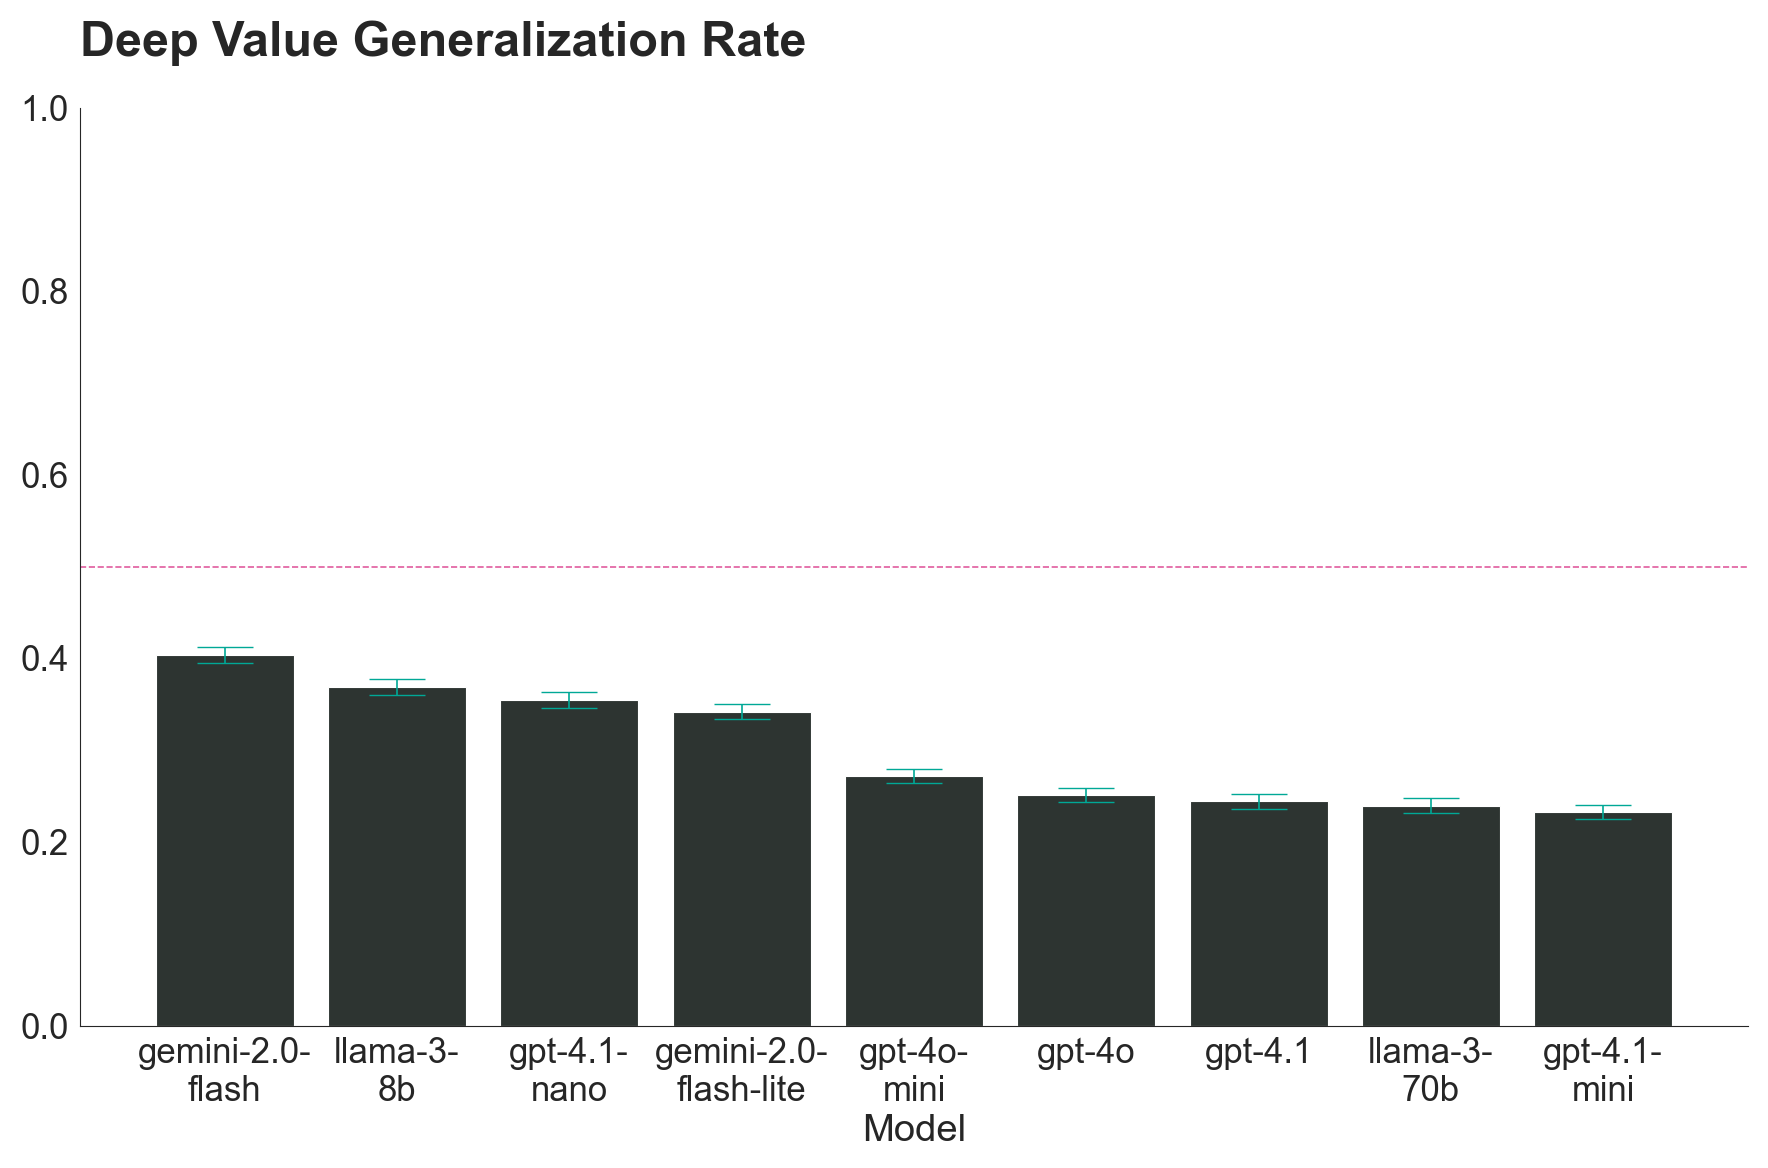

M = 0.30, SD = 0.46, Mdn = 0.00
Mode = 0.00
{'mean': np.float64(0.3), 'median': np.float64(0.0), 'sd': np.float64(0.46), 'mode': np.float64(0.0)} 2


In [8]:
# set figsize 18,12

mypal = make_aesthetic(font_scale=2.5)
df_comparison = df_comparison.sort_values(by='point_estimate', ascending=False)
df_comparison = df_comparison.reset_index(drop=True)


plt.figure(figsize=(18, 12))
ax = sns.barplot(data=df_comparison, x='shorter_model', y='point_estimate')

for i in range(len(df_comparison)):
    row = df_comparison.iloc[i]
    ax.errorbar(
        i, 
        row['point_estimate'],
        yerr=[[row['point_estimate'] - row['point_estimate_lower']], 
              [row['point_estimate_upper'] - row['point_estimate']]],
        fmt='none', 
        color=mypal[2], 
        capsize=20
    )

# Customize the plot
plt.title('Deep Value Generalization Rate', fontweight='bold')
plt.xlabel('Model')
plt.ylabel('')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.axhline(y=0.5, color=mypal[1], linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("plots/model_level_summary2.pdf", dpi=300, bbox_inches='tight')
plt.show()


print(array_stats(df['y']), 2)

df_comparison

## Table of raw vs model DVGRs

In [9]:
# data_pt = {
#         'model': llm,
#         'point_estimate': point_estimate,
#         'point_estimate_lower': point_estimate_lower,
#         'point_estimate_upper': point_estimate_upper, 
#         'model_prob': prob,
#         'model_prob_lower': lower,
#         'model_prob_upper': upper,
#         'n': len(tdf),
#     }
   

comppoints = []
for model in df_comparison['model'].unique():
    tdf = df_comparison[df_comparison['model']==model].iloc[0]
    raw_point_estimate = tdf['point_estimate']
    raw_lower = tdf['point_estimate_lower']
    raw_upper = tdf['point_estimate_upper']

    model_point_estimate = tdf['model_prob']
    model_lower = tdf['model_prob_lower']
    model_upper = tdf['model_prob_upper']

    raw_str = f"{smart_rounder(raw_point_estimate, 2)} [{smart_rounder(raw_lower, 2)}, {smart_rounder(raw_upper, 2)}]"
    model_str = f"{smart_rounder(model_point_estimate, 2)} [{smart_rounder(model_lower, 2)}, {smart_rounder(model_upper, 2)}]"
    stars = p_value_stars(tdf['binomial_p'])

    comppoint = {
        'Model': model,
        'Raw Estimate': raw_str,
        'Mixed Model Estimate': model_str,
        'P-Value': stars
    }
    comppoints.append(comppoint)

comdf = pd.DataFrame(comppoints)
comdf = comdf.sort_values(by='Raw Estimate')

comdf.to_latex(
    "tables/point_v_model.tex",
    index=False,
    escape=False,
    caption = "Comparison of DVGR estimates from raw data and mixed models that account for model-specific propensities to generalize certain deep values over others. 95\% CIs in brackets. Raw Estimate CIs are computed using the Wilson method. Model Estimate CIs are from the Pymer4 package. P-Value refers to p-value from two-tailed binomial test for whether the raw proportion differs from chance (0.5). $***p < 0.001; **p<0.01; *p<0.05$.",
    label="point_v_model"
)





<>:43: SyntaxWarning: invalid escape sequence '\%'
<>:43: SyntaxWarning: invalid escape sequence '\%'
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/321145626.py:43: SyntaxWarning: invalid escape sequence '\%'
  caption = "Comparison of DVGR estimates from raw data and mixed models that account for model-specific propensities to generalize certain deep values over others. 95\% CIs in brackets. Raw Estimate CIs are computed using the Wilson method. Model Estimate CIs are from the Pymer4 package. P-Value refers to p-value from two-tailed binomial test for whether the raw proportion differs from chance (0.5). $***p < 0.001; **p<0.01; *p<0.05$.",


# Big v Small Comparison

## Get data

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association



mypal = make_aesthetic()

def chi2(x, y, report_cramer=False):
    """
    Perform Chi-squared test for independence.
    
    Parameters:
    - x: First categorical variable
    - y: Second categorical variable
    - report_cramer: If True, report Cramer's V statistic which is an effect size measure
    
    Returns:
    - chi2_stat: Chi-squared statistic
    - p_value: p-value from the test
    - dof: Degrees of freedom
    """
    contingency_table = pd.crosstab(x, y)
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    data_pt = {'chi2': chi2_stat, 'p_value': p_value, 'dof': dof}
    
    if report_cramer:
        cramer_v = association(contingency_table, method='cramer')
        data_pt['cramer_v'] = cramer_v
    
    return data_pt

def compare_models_chi2(df, model1, model2):
    """
    Compare two models using chi-square test with the existing chi2 function.
    
    Parameters:
    - df: DataFrame containing the data
    - model1: Name of the first model
    - model2: Name of the second model
    
    Returns:
    - Dictionary with test results and model proportions
    """
    # Filter data for the two models
    model_data = df[df['model_short'].isin([model1, model2])].copy()
    
    # Create a new binary column to indicate which model each row belongs to
    
    # Use the existing chi2 function to test independence
    chi2_result = chi2(model_data['model_short'], model_data['generalized_deep_value'], report_cramer=True)
    
    # Calculate proportions for each model
    prop1 = model_data[model_data['model_short'] == model1]['generalized_deep_value'].mean()
    prop2 = model_data[model_data['model_short'] == model2]['generalized_deep_value'].mean()
    diff = prop2 - prop1
    
    # Combine results
    result = {
        'chi2': chi2_result['chi2'],
        'p_value': chi2_result['p_value'],
        'dof': chi2_result['dof'],
        'cramer_v': chi2_result.get('cramer_v', None),
        'diff': diff,
        'prop1': prop1,
        'prop2': prop2
    }
    
    print(f"Comparing {model1} and {model2}")
    print(f"DVGR: {prop1:.2f} vs {prop2:.2f}")
    print(f"Chi-square: {result['chi2']:.2f}, p-value: {result['p_value']:.4f}")
    if 'cramer_v' in result:
        print(f"Cramer's V: {result['cramer_v']:.4f}")
    
    return result


comparisons = [("gemini-2.0-flash-lite", "gemini-2.0-flash"), ("gpt-4.1-nano", "gpt-4.1-mini"), ("gpt-4.1-mini", "gpt-4.1"), ("gpt-4o-mini", "gpt-4o"), ("llama-3-8b", "llama-3-70b")]


results = []
for smaller_model, larger_model in comparisons:
    print(f"Processing comparison: {smaller_model} vs {larger_model}")
    result = compare_models_chi2(df, smaller_model, larger_model)
    results.append({
        'smaller_model': smaller_model,
        'larger_model': larger_model,
        'chi2': result['chi2'],
        'p_value': result['p_value'],
        'dof': result['dof'],
        'cramer_v': result.get('cramer_v', None),
        'diff': result['diff'],
        'smaller_prop': result['prop1'],
        'larger_prop': result['prop2']
    })


resdf = pd.DataFrame(results)
resdf['abs_diff'] = resdf['diff'].abs()

print(array_stats(resdf['abs_diff']), 2)


Processing comparison: gemini-2.0-flash-lite vs gemini-2.0-flash
Comparing gemini-2.0-flash-lite and gemini-2.0-flash
DVGR: 0.34 vs 0.40
Chi-square: 97.30, p-value: 0.0000
Cramer's V: 0.0638
Processing comparison: gpt-4.1-nano vs gpt-4.1-mini
Comparing gpt-4.1-nano and gpt-4.1-mini
DVGR: 0.35 vs 0.23
Chi-square: 427.97, p-value: 0.0000
Cramer's V: 0.1337
Processing comparison: gpt-4.1-mini vs gpt-4.1
Comparing gpt-4.1-mini and gpt-4.1
DVGR: 0.23 vs 0.24
Chi-square: 3.96, p-value: 0.0465
Cramer's V: 0.0132
Processing comparison: gpt-4o-mini vs gpt-4o
Comparing gpt-4o-mini and gpt-4o
DVGR: 0.27 vs 0.25
Chi-square: 12.75, p-value: 0.0004
Cramer's V: 0.0236
Processing comparison: llama-3-8b vs llama-3-70b
Comparing llama-3-8b and llama-3-70b
DVGR: 0.37 vs 0.24
Chi-square: 441.57, p-value: 0.0000
Cramer's V: 0.1398
M = 0.07, SD = 0.05, Mdn = 0.06
Mode = 0.06
{'mean': np.float64(0.07), 'median': np.float64(0.06), 'sd': np.float64(0.05), 'mode': np.float64(0.06)} 2


In [11]:
results

[{'smaller_model': 'gemini-2.0-flash-lite',
  'larger_model': 'gemini-2.0-flash',
  'chi2': np.float64(97.297406119898),
  'p_value': np.float64(5.965843100799385e-23),
  'dof': 1,
  'cramer_v': 0.06375764858808222,
  'diff': np.float64(0.06166666666666665),
  'smaller_prop': np.float64(0.3421666666666667),
  'larger_prop': np.float64(0.4038333333333333)},
 {'smaller_model': 'gpt-4.1-nano',
  'larger_model': 'gpt-4.1-mini',
  'chi2': np.float64(427.9721697717024),
  'p_value': np.float64(4.4900121380964536e-95),
  'dof': 1,
  'cramer_v': 0.13366763305438664,
  'diff': np.float64(-0.12180141503937508),
  'smaller_prop': np.float64(0.3549624687239366),
  'larger_prop': np.float64(0.23316105368456153)},
 {'smaller_model': 'gpt-4.1-mini',
  'larger_model': 'gpt-4.1',
  'chi2': np.float64(3.964198777459817),
  'p_value': np.float64(0.04647763565877209),
  'dof': 1,
  'cramer_v': 0.013207713176239854,
  'diff': np.float64(0.011267350177208757),
  'smaller_prop': np.float64(0.2331610536845615

## Plot

/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/3455233704.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/3455233704.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(['small', 'big'], fontsize=small_font)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/3455233704.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/3455233704.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks,

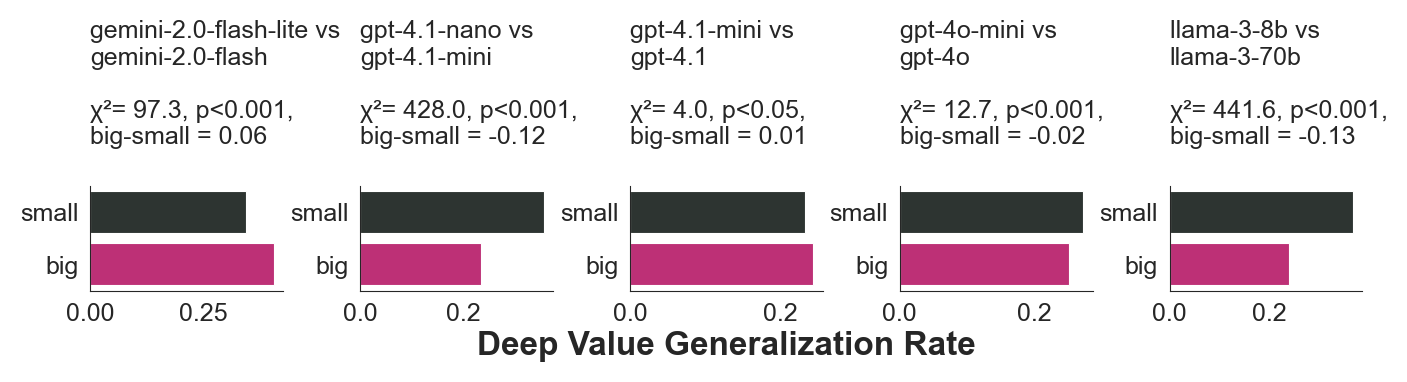

In [12]:
mypal = make_aesthetic()

def pval_buckets(p):
    """
    Categorize p-value into buckets.
    
    Parameters:
    - p: p-value
    
    Returns:
    - String indicating the bucket
    """
    if p < 0.001:
        return "p<0.001"
    elif p < 0.01:
        return "p<0.01"
    elif p < 0.05:
        return "p<0.05"
    else:
        return "ns"

# Create visualization
small_font = 18
bigger_font = 24

# Create a figure with the right number of subplots
fig, axes = plt.subplots(1, len(comparisons), figsize=(14, 4))

# Make sure axes is always a list even with a single comparison
if len(comparisons) == 1:
    axes = [axes]

for i, (smaller_model, larger_model) in enumerate(comparisons):
    pair_data = df[df['model_short'].isin([smaller_model, larger_model])].copy()

    # Get the computed result for this pair
    result = next(r for r in results if r['smaller_model'] == smaller_model and r['larger_model'] == larger_model)
    
    p_value = pval_buckets(result['p_value'])
    diff = smart_rounder(result['diff'], precision=2)
    chi2_val = smart_rounder(result['chi2'], precision=1)
    cramer_v = smart_rounder(result.get('cramer_v', 0), precision=2)

    # Create a categorical order to ensure smaller model is shown first
    model_order = [smaller_model, larger_model]

    # Create the plot - using horizontal bars
    sns.barplot(
        data=pair_data,
        y='model_short',  # Make sure to use model_short to match your filtering
        x='generalized_deep_value',
        estimator=lambda x: np.mean(x),
        errorbar=None,  # No error bars needed
        order=model_order,
        ax=axes[i],
        orient='h',  # Horizontal orientation, 
        palette=mypal[0:2]
    )

    # Customize the plot
    axes[i].set_title(f'{smaller_model} vs\n{larger_model}\n\nχ²= {chi2_val}, {p_value},\nbig-small = {diff}', fontsize=small_font)
    if i == 2:
        axes[i].set_xlabel('Deep Value Generalization Rate', fontsize=bigger_font, fontweight='bold')

    else:
        axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    axes[i].set_yticklabels(['small', 'big'], fontsize=small_font)
    axes[i].tick_params(axis='x', labelsize=small_font)


    sns.despine(ax=axes[i])

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)  
plt.savefig('plots/model_comparison_big_small.pdf', dpi=300, bbox_inches='tight')
plt.show()


# N Training Examples

n= 4 (0.31, 95% CI= [0.30, 0.31])
n= 20 (0.30, 95% CI= [0.30, 0.30])
n= 40 (0.30, 95% CI= [0.29, 0.30])


/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/2545117632.py:55: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


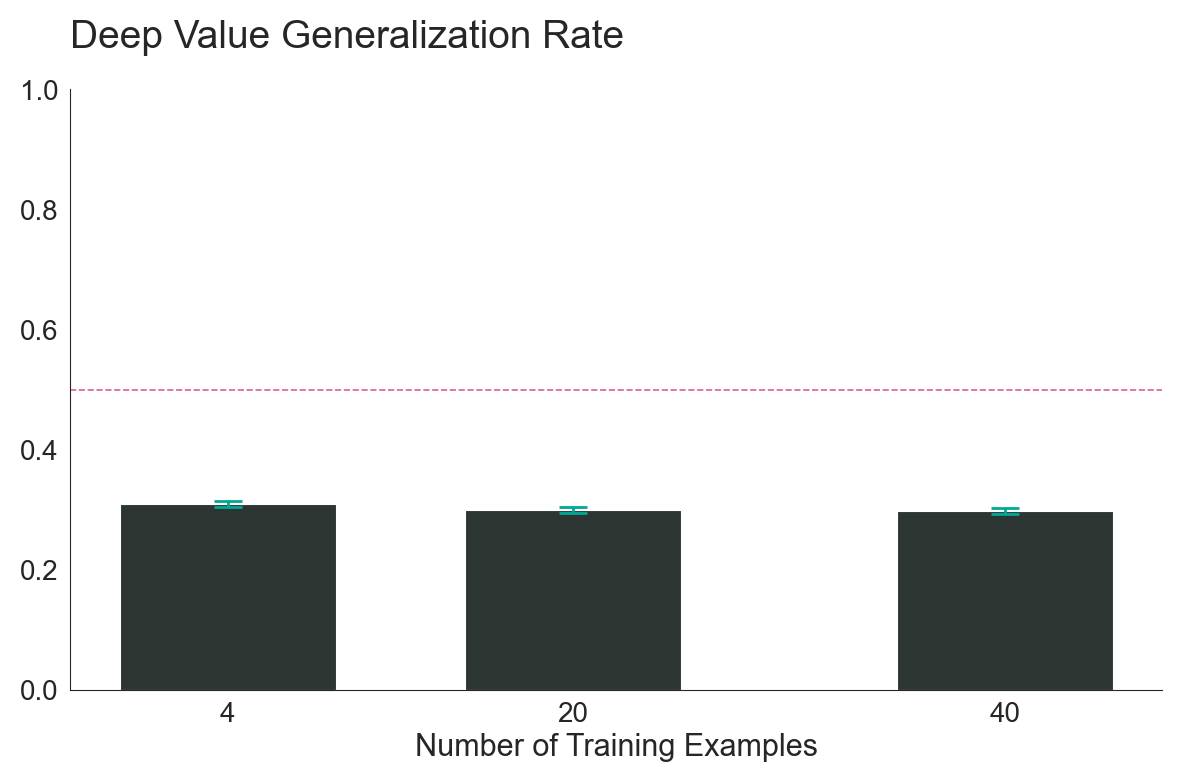

{'chi2': np.float64(13.496271234867672), 'p_value': np.float64(0.001173064624551805), 'dof': 2, 'cramer_v': 0.011352243928162989}


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportion_confint


train_df = []
n_training_examples = df['n_training_examples'].unique()

for n in n_training_examples:
    tdf = df[df['n_training_examples'] == n]
    y_sum = tdf['generalized_deep_value'].sum()
    y_mean = tdf['generalized_deep_value'].mean()
    low, high = proportion_confint(y_sum, len(tdf), method='wilson')
    train_df.append({
        'n_training_examples': n,
        'point_estimate': y_mean,
        'low': low,
        'high': high
    })
    print(f"n= {n} ({y_mean:.2f}, 95% CI= [{low:.2f}, {high:.2f}])")

train_dfs = pd.DataFrame(train_df)

plt.figure(figsize=(12, 8))

bars = plt.bar(
    train_dfs['n_training_examples'], 
    train_dfs['point_estimate'],
    color=mypal[0],
    width=10
)

# Error bars
plt.errorbar(
    train_dfs['n_training_examples'],
    train_dfs['point_estimate'],
    yerr=[
        train_dfs['point_estimate'] - train_dfs['low'],
        train_dfs['high'] - train_dfs['point_estimate']
    ],
    fmt='none',
    color=mypal[2],
    capsize=10,
    capthick=2,
    elinewidth=2
)

plt.xticks(train_dfs['n_training_examples'], labels=train_dfs['n_training_examples'], rotation=0)

plt.ylim(0, 1)
plt.axhline(y=0.5, color=mypal[1], linestyle='--', alpha=0.7)
plt.xlabel('Number of Training Examples')
plt.title('Deep Value Generalization Rate')
plt.tight_layout()

plt.show()

print(chi2(df['n_training_examples'], df['generalized_deep_value'], report_cramer=True))



# Context

context= commerce (n=12856, est=0.36, 95% CI= [0.36, 0.37])
context= communication (n=13223, est=0.27, 95% CI= [0.26, 0.28])
context= customer service (n=13121, est=0.24, 95% CI= [0.24, 0.25])
context= education (n=12988, est=0.27, 95% CI= [0.26, 0.27])
context= finance (n=13227, est=0.33, 95% CI= [0.32, 0.34])
context= healthcare (n=12890, est=0.35, 95% CI= [0.34, 0.36])
context= legal (n=13149, est=0.29, 95% CI= [0.29, 0.30])
context= productivity (n=13271, est=0.30, 95% CI= [0.29, 0.31])


/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/2917736933.py:67: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


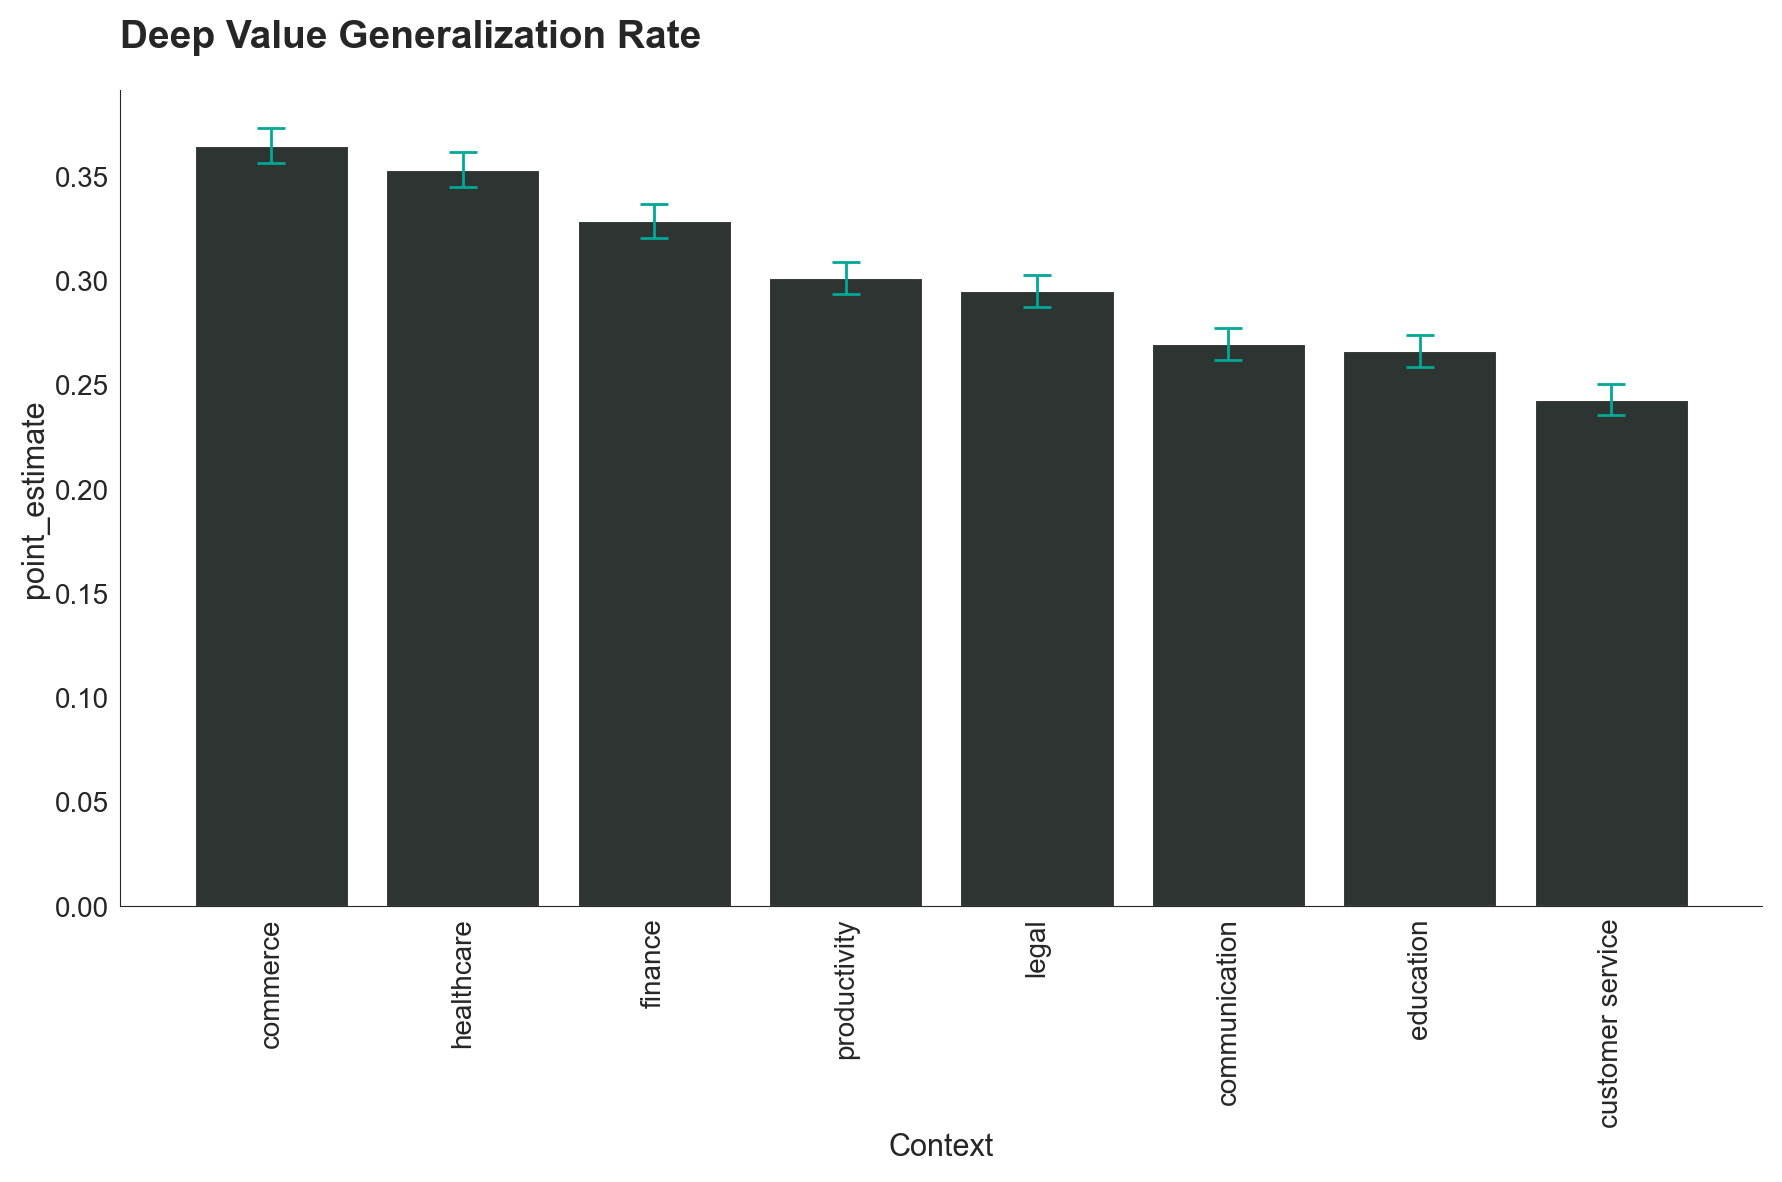

chi2: 807.91
p_value: 0.00
dof: 7.00
cramer_v: 0.09


In [14]:
def compute_estimates_by_factor(df, factor_col, target_col, method='wilson'):
    """
    Compute point estimates and confidence intervals for a binary variable across 
    different levels of a grouping factor.
    
    Helper function for breaking things out by factor. 
   
    """
    from statsmodels.stats.proportion import proportion_confint
    
    result_df = []
    factor_values = df[factor_col].unique()
    
    for value in factor_values:
        tdf = df[df[factor_col] == value]
        
        count = len(tdf)
        y_sum = tdf[target_col].sum()
        y_mean = tdf[target_col].mean()
        
        low, high = proportion_confint(y_sum, count, method=method)
        
        result_df.append({
            factor_col: value,
            'count': count,
            'point_estimate': y_mean,
            'low': low,
            'high': high
        })
        
        print(f"{factor_col}= {value} (n={count}, est={y_mean:.2f}, 95% CI= [{low:.2f}, {high:.2f}])")
    
    return pd.DataFrame(result_df)

result = compute_estimates_by_factor(df, 'context', 'generalized_deep_value')
result = result.sort_values(by='point_estimate', ascending=False)
factor = 'context'


plt.figure(figsize=(18,12))
sns.barplot(
    data=result,
    x=factor,
    y='point_estimate',
    color=mypal[0],
    width=0.8
)
plt.xticks(rotation=90)
plt.errorbar(
    result['context'],
    result['point_estimate'],
    yerr=[
        result['point_estimate'] - result['low'],
        result['high'] - result['point_estimate']
    ],
    fmt='none',
    color=mypal[2],
    capsize=10,
    capthick=2,
    elinewidth=2
)


plt.xlabel('Context')

plt.title('Deep Value Generalization Rate', fontweight='bold')
plt.tight_layout()
plt.savefig("plots/context_dvgr.pdf", dpi=300, bbox_inches='tight')

plt.show()

chi2_res = chi2(df['context'], df['y'], report_cramer=True)
for k, v in chi2_res.items():
    print(f"{k}: {v:.2f}")

# Values

clean_value1= fidelity (n=11615, est=0.22, 95% CI= [0.21, 0.22])
clean_value1= reparation (n=8299, est=0.31, 95% CI= [0.30, 0.32])
clean_value1= justice (n=9372, est=0.33, 95% CI= [0.32, 0.34])
clean_value1= beneficence (n=10715, est=0.24, 95% CI= [0.23, 0.24])
clean_value1= self-improvement (n=9676, est=0.20, 95% CI= [0.19, 0.21])
clean_value1= non-maleficence (n=12073, est=0.27, 95% CI= [0.26, 0.28])
clean_value1= security (n=8489, est=0.31, 95% CI= [0.30, 0.32])
clean_value1= conformity (n=9209, est=0.32, 95% CI= [0.31, 0.32])
clean_value1= tradition (n=7119, est=0.51, 95% CI= [0.50, 0.52])
clean_value1= benevolence (n=7391, est=0.28, 95% CI= [0.27, 0.29])
clean_value1= universalism (n=10767, est=0.42, 95% CI= [0.41, 0.43])


/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/633311359.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


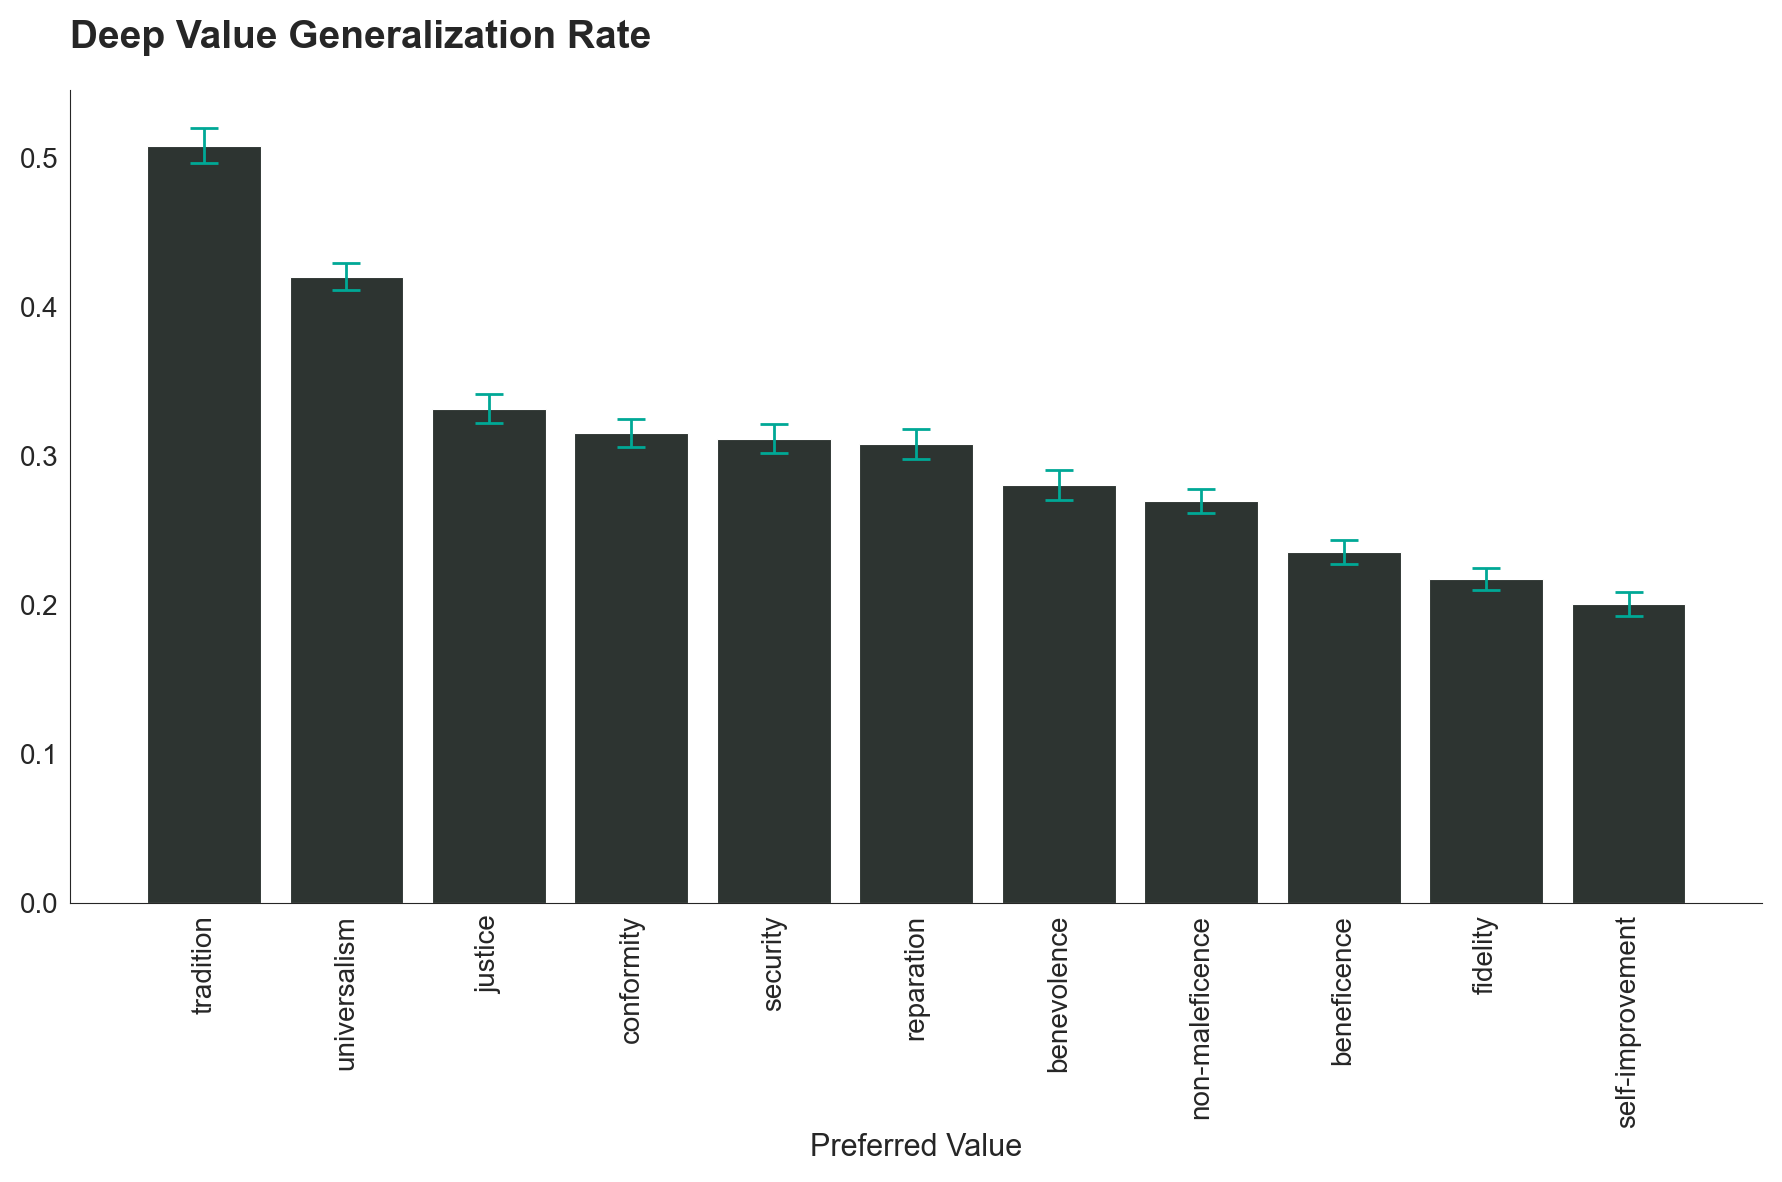

{'chi2': np.float64(3363.9310503727797), 'p_value': np.float64(0.0), 'dof': 10, 'cramer_v': 0.17922490476272335}
chi2: 3363.93
p_value: 0.00
dof: 10.00
cramer_v: 0.18


In [15]:
def clean_value1_name(x):
    if x=="self":
        return "self-improvement"
    elif x=="non":
        return "non-maleficence"
    else:
        return x


df['clean_value1'] = df['value1'].apply(clean_value1_name)
result = compute_estimates_by_factor(df, 'clean_value1', 'generalized_deep_value')
result = result.sort_values(by='point_estimate', ascending=False)
factor = 'clean_value1'


plt.figure(figsize=(18,12))
sns.barplot(
    data=result,
    x=factor,
    y='point_estimate',
    color=mypal[0],
    width=0.8
)
plt.xticks(rotation=90)
plt.errorbar(
    result[factor],
    result['point_estimate'],
    yerr=[
        result['point_estimate'] - result['low'],
        result['high'] - result['point_estimate']
    ],
    fmt='none',
    color=mypal[2],
    capsize=10,
    capthick=2,
    elinewidth=2
)


plt.xlabel('Preferred Value')
plt.ylabel('')

plt.title('Deep Value Generalization Rate', fontweight='bold')
plt.tight_layout()
plt.savefig("plots/context_value2.pdf", dpi=300, bbox_inches='tight')

plt.show()

chi2_res = chi2(df['value1'], df['y'], report_cramer=True)
print(chi2_res)
for k, v in chi2_res.items():
    print(f"{k}: {v:.2f}")

# Logit model combined

## Run model

In [107]:
import statsmodels.formula.api as smf
import pandas as pd

def get_reference(df, factor, measure_col, how='mean'):
    """
    Aggregates a measure column by a factor and computes the min, max, and median factor levels.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        factor (str): The column to group by.
        measure_col (str): The column to aggregate.
        how (str): The aggregation function to use ('mean', 'sum', etc.). Default is 'mean'.

    Returns:
        dict: A dictionary with min, max, and median factor levels and their corresponding values.
    """
    grouped = df.groupby(by=factor)[measure_col].agg(how).reset_index()

    min_row = grouped.loc[grouped[measure_col].idxmin()]
    max_row = grouped.loc[grouped[measure_col].idxmax()]
    
    median_idx = len(grouped) // 2
    sorted_grouped = grouped.sort_values(by=measure_col)
    median_row = sorted_grouped.iloc[median_idx]

    result = {
        'min_factor': min_row[factor],
        'min_value': min_row[measure_col],
        'max_factor': max_row[factor],
        'max_value': max_row[measure_col],
        'median_factor': median_row[factor],  # No need for .values[0]
        'median_value': median_row[measure_col]  # No need for .values[0]
    }

    return result


# Values
def clean_value1_name(x):
    if x == "self":
        return "self-improvement"
    elif x == "non":
        return "non-maleficence"
    else:
        return x
    
df['clean_value1'] = df['value1'].apply(clean_value1_name)
context_factor = get_reference(df, "context", "y")
model_short_factor = get_reference(df, "model_short", "y")
value_factor = get_reference(df, "clean_value1", "y")

context_median = context_factor['median_factor']
model_short_median = model_short_factor['median_factor']
value_median = value_factor['median_factor']

formula = (
    f"y ~ C(model_short, Treatment(reference='{model_short_median}')) + "
    f"C(context, Treatment(reference='{context_median}')) + "
    f"C(clean_value1, Treatment(reference='{value_median}')) + "
    "n_training_examples"
)

logit_model = smf.logit(formula=formula, data=df).fit()

# Print the summary of the model
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.582426
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               104725
Model:                          Logit   Df Residuals:                   104698
Method:                           MLE   Df Model:                           26
Date:                Mon, 12 May 2025   Pseudo R-squ.:                 0.04969
Time:                        18:53:10   Log-Likelihood:                -60995.
converged:                       True   LL-Null:                       -64184.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------

In [24]:
context_factor

{'min_factor': 'customer service',
 'min_value': np.float64(0.24289307217437694),
 'max_factor': 'commerce',
 'max_value': np.float64(0.36457685127566897),
 'median_factor': 'legal',
 'median_value': np.float64(0.29492737090273025)}

/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/4097301909.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  sum_res = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/4097301909.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_res['var'] = sum_res['var'].apply(clean_var_name)


marker dict {'value1 = tradition (reference: reparation)': 's', 'model = gemini-2.0-flash (reference: gpt-4o-mini)': 'o', 'value1 = universalism (reference: reparation)': 's', 'model = llama-3-8b (reference: gpt-4o-mini)': 'o', 'model = gpt-4.1-nano (reference: gpt-4o-mini)': 'o', 'model = gemini-2.0-flash-lite (reference: gpt-4o-mini)': 'o', 'context = healthcare (reference: productivity)': 'p', 'context = commerce (reference: productivity)': 'p', 'context = finance (reference: productivity)': 'p', 'value1 = justice (reference: reparation)': 's', 'value1 = security (reference: reparation)': 's', 'value1 = conformity (reference: reparation)': 's', 'n training examples': 'v', 'context = communication (reference: productivity)': 'p', 'context = legal (reference: productivity)': 'p', 'model = gpt-4o (reference: gpt-4o-mini)': 'o', 'value1 = benevolence (reference: reparation)': 's', 'model = gpt-4.1 (reference: gpt-4o-mini)': 'o', 'context = education (reference: productivity)': 'p', 'mod

/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_46897/4097301909.py:81: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


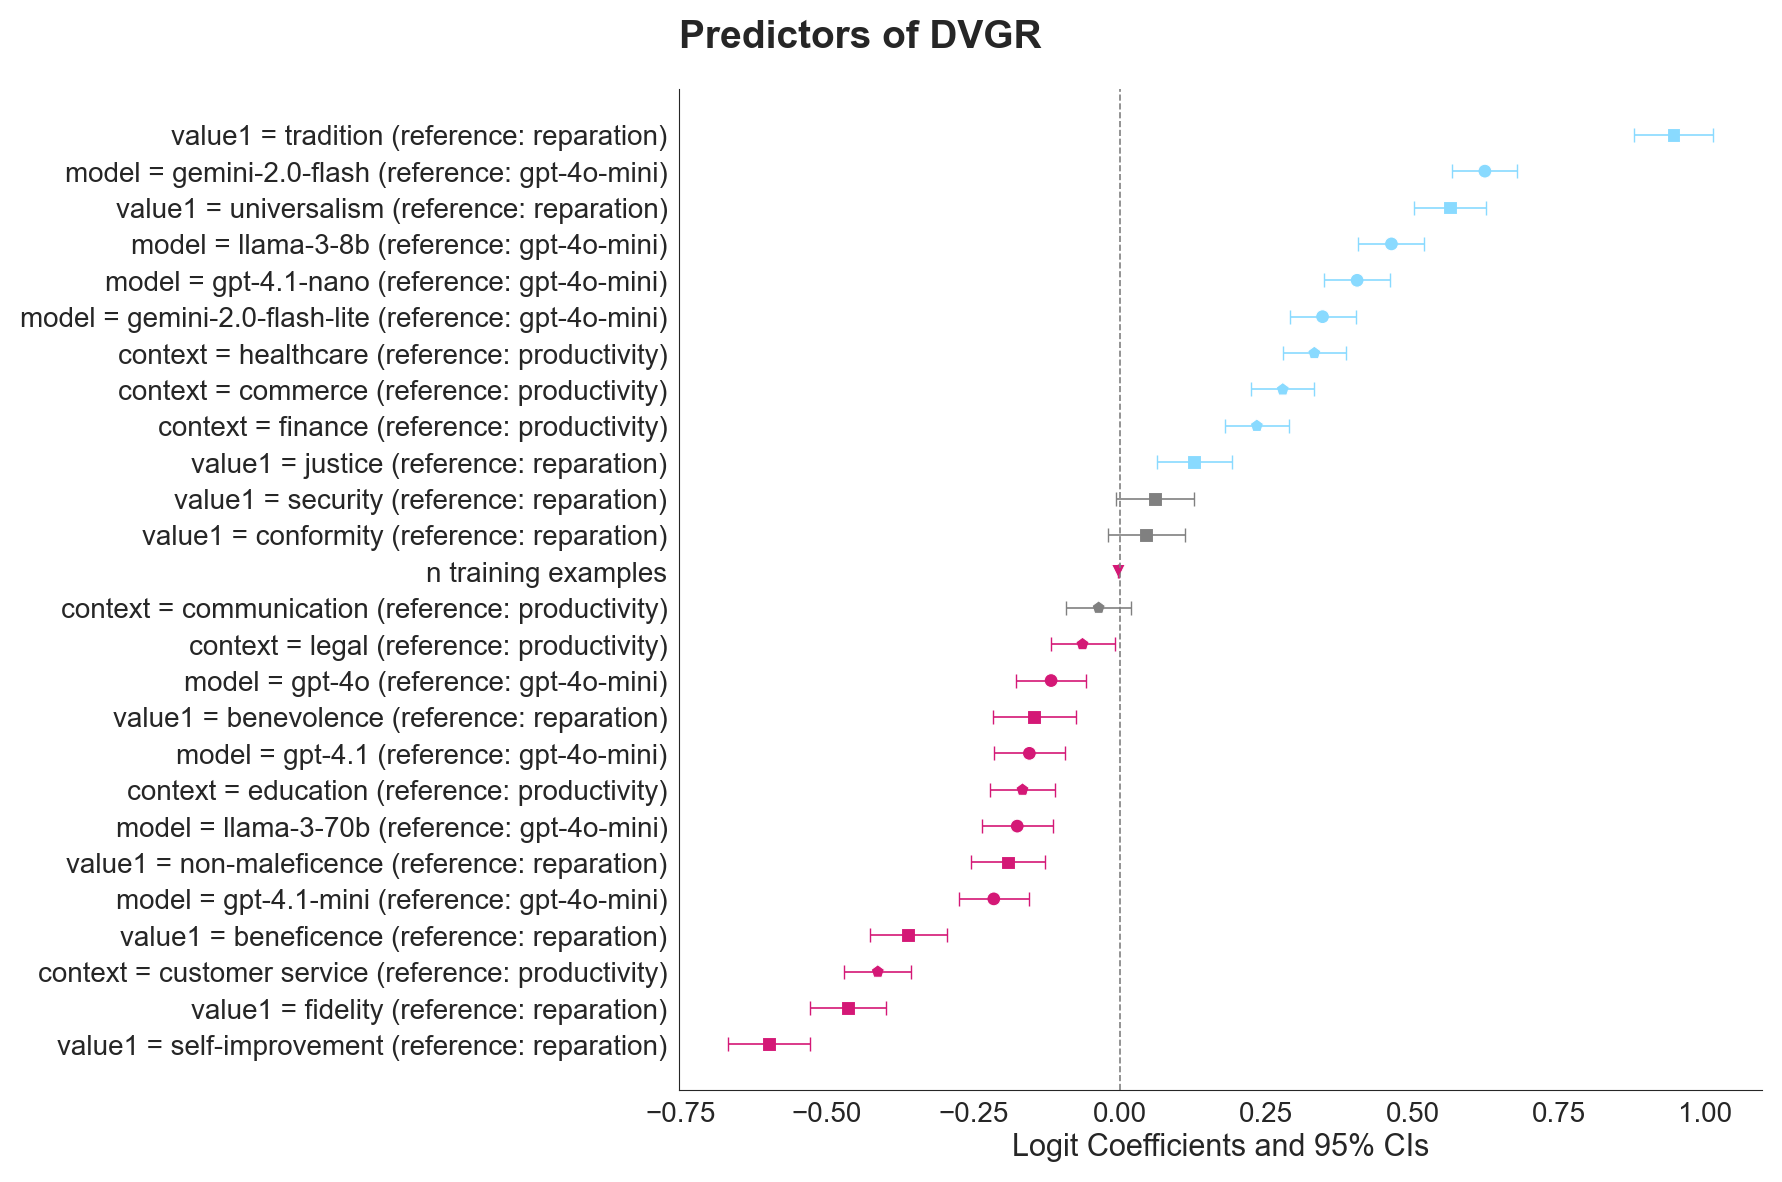

In [108]:
def plot_statsmodels(model, exp=False, 
                     figsize=(18,12),
                     color_dict={'ns': 'gray', 'neg': '#D41876', 'pos': '#89DAFF'}, 
                     drop_intercept=True, 
                     clean_var_name=None):
    """
    Plots a statsmodels object with custom markers and error bars.
    """
    sum_res = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()
    if "P>|t|" in sum_res.columns:
        type_stat = "t"
    elif "P>|z|" in sum_res.columns:
        type_stat = "z"
    
    if exp:
        sig_threshold = 1
        for v in ['coef', '[0.025', '0.975]']:
            sum_res[v] = np.exp(sum_res[v])
    else:
        sig_threshold = 0

    sum_res = sum_res.rename(columns={'index': 'var'})
    if drop_intercept:
        sum_res = sum_res.query("var != 'Intercept'")

    if clean_var_name:
        sum_res['var'] = sum_res['var'].apply(clean_var_name)
    
    sum_res = sum_res.sort_values(by=['coef'], ascending=False)
    sum_res['var'] = sum_res['var'].apply(lambda x: x.replace("T.", ""))
    sum_res['error_lower'] = sum_res['coef'] - sum_res['[0.025']
    sum_res['error_upper'] = sum_res['0.975]'] - sum_res['coef']
    
    if color_dict:
        sum_res['color'] = sum_res.apply(
            lambda row: color_dict['pos'] if (row[f'P>|{type_stat}|'] < 0.05 and row['coef'] > sig_threshold) 
            else (color_dict['neg'] if (row[f'P>|{type_stat}|'] < 0.05 and row['coef'] < sig_threshold) 
            else color_dict['ns']), axis=1)
    else:
        sum_res['color'] = 'black'
        
    # Create marker dictionary
    marker_dict = {}
    for var in sum_res['var'].unique():
        if "model" in var:
            marker_dict[var] = "o"
        elif "value" in var:
            marker_dict[var] = "s"
        elif "context" in var:
            marker_dict[var] = "p"
        else:
            marker_dict[var] = "v"
            
    print("marker dict", marker_dict)
                
    plt.figure(figsize=figsize)
    
    # Add error bars
    for index, row in sum_res.iterrows():
        plt.errorbar(
            row['coef'], row['var'], 
            xerr=[[row['error_lower']], [row['error_upper']]], 
            fmt=marker_dict[row['var']], capsize=5, color=row['color']
        )
    
    # Scatter plot with custom markers
    sns.scatterplot(
        y='var', x='coef', data=sum_res, 
        hue='var', palette=sum_res['color'].tolist(), 
        style='var', markers=marker_dict, s=100
    )
    
    # Add vertical line for significance threshold
    plt.axvline(x=sig_threshold, color='gray', linestyle='dashed')
    plt.title("Predictors of DVGR", fontweight='bold')
    plt.xlabel("Logit Coefficients and 95% CIs")
    plt.ylabel("")
    legend = plt.legend()  # Get the legend object
    if legend:
        legend.set_visible(False)  # Hide the legend
    plt.tight_layout()
    
    return plt.gca()


 
    
   
        
def clean_factor_name(var_name):
    """Cleans and formats factor variable names from statsmodels output.
    
    This function extracts the variable name, factor level, and reference value 
    from statsmodels factor strings and formats them in a more readable way.
    It handles both complete strings and truncated/partial strings.
    
    Args:
        var_name (str): The variable name to clean, typically from statsmodels summary.
            Examples include strings like:
            "C(value1, Treatment(reference='reparation'))[tradition]" or
            "_short, Treatment(reference='gpt-4o-mini'))[gemini-2.0-flash]"
    
    Returns:
        str: A cleaned and formatted variable name in the format:
            "variable = factor_level (reference: ref_value)"
    """
    var_name = var_name.replace("model_short", "model")
    var_name = var_name.replace("clean_value1", "value1")
    
    pattern = r"C\((\w+),\s*Treatment\(reference='([^']+)'\)\)\[([^\]]+)\]"
    
    match = re.match(pattern, var_name)
    
    if match:
        var, ref, level = match.groups()
        return f"{var} = {level} (reference: {ref})"
    
    partial_pattern = r"(?:C\()?(\w+)(?:,\s*Treatment\(reference='([^']+)'\))?\)?\[([^\]]+)\]?"
    partial_match = re.search(partial_pattern, var_name)
    
    if partial_match:
        var, ref, level = partial_match.groups()
        if ref:
            return f"{var} = {level} (reference: {ref})"
        else:
            return f"{var} = {level}"
    
    # If no match found, return the original string
    return var_name.replace("_", " ")

ax = plot_statsmodels(logit_model, clean_var_name=clean_factor_name)
plt.savefig("plots/logit.pdf")



# Multivariate Cramer V 

In [109]:
def quick_p_format(x):
    """
    Formats a p-value for display.

    Parameters:
    - x: The p-value to format (float).

    Returns:
    - A string representing the formatted p-value.
    """
    if x < 0.0001:
        return "p<0.0001"
    elif x < 0.001:
        return "p<0.001"
    elif x < 0.01:
        return "p<0.01"
    elif x < 0.05:
        return "p<0.05"
    else:
        return f"p={x:.2f}"

def format_row(r):
    s = f"chi2({r['dof']}) = {smart_rounder(r['chi2'])}, {quick_p_format(r['p_value'])}"
    return s

data_pts = []
for var in ['context', 'model', 'value1', 'n_training_examples']:
    df2 = df.copy()
    df2[var] = df2[var].astype(str)
    chi2_res = chi2(df2[var], df2['y'], report_cramer=True)
    data_pt = {"factor":var}
    data_pt.update(chi2_res)
    data_pts.append(data_pt)
    
ddf = pd.DataFrame(data_pts)

ddf['Chi2'] = ddf.apply(format_row, axis=1)
ddf['Factor'] = ddf['factor'].apply(lambda x: x.replace("_", " "))
ddf["Cramer V"] = ddf['cramer_v'].apply(lambda x: smart_rounder(x,2))
ddf = ddf.sort_values(by=['cramer_v'], ascending=False)

ddf[['Factor', 'Chi2', "Cramer V"]].to_latex("tables/cramerv.tex", index=False, caption="Chi2 tests on whether DVGR varies by factor. Cramer's V is a standardized effect size measure (0 to 1) for the strength of association between two variables.")


In [95]:
ddf

,factor,chi2,p_value,dof,cramer_v,str,Cramer's V
0,context,807.914446,3.635455e-170,7,0.087833,"chi2(7) = 807.91, p<0.0001",0.09
1,model,1918.036052,0.000000e+00,8,0.135333,"chi2(8) = 1918.04, p<0.0001",0.14
2,value1,3363.931050,0.000000e+00,10,0.179225,"chi2(10) = 3363.93, p<0.0001",0.18
3,n training examples,13.496271,1.173065e-03,2,0.011352,"chi2(2) = 13.5, p<0.01",0.01


In [ ]:
round

# Heatmap Model